In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
# Constants
DATA_PATH = 'NewGeneratedData/'
# Loading functions
def load_data_frame(txt):
    return pd.read_csv(DATA_PATH + txt + '.txt', header=None, sep='\s+')

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lt/w0169b7x5ml3psz3nly9vj3m0000gn/T/ipykernel_63474/2472777258.py:5: SyntaxWarning: invalid escape sequence '\s'
  return pd.read_csv(DATA_PATH + txt + '.txt', header=None, sep='\s+')


/var/folders/lt/w0169b7x5ml3psz3nly9vj3m0000gn/T/ipykernel_63474/3679520369.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  activity_labels.activity[i] = activity_labels.activity[i].replace("_", " ")
/var/folders/lt/w0169b7x5ml3psz3nly9

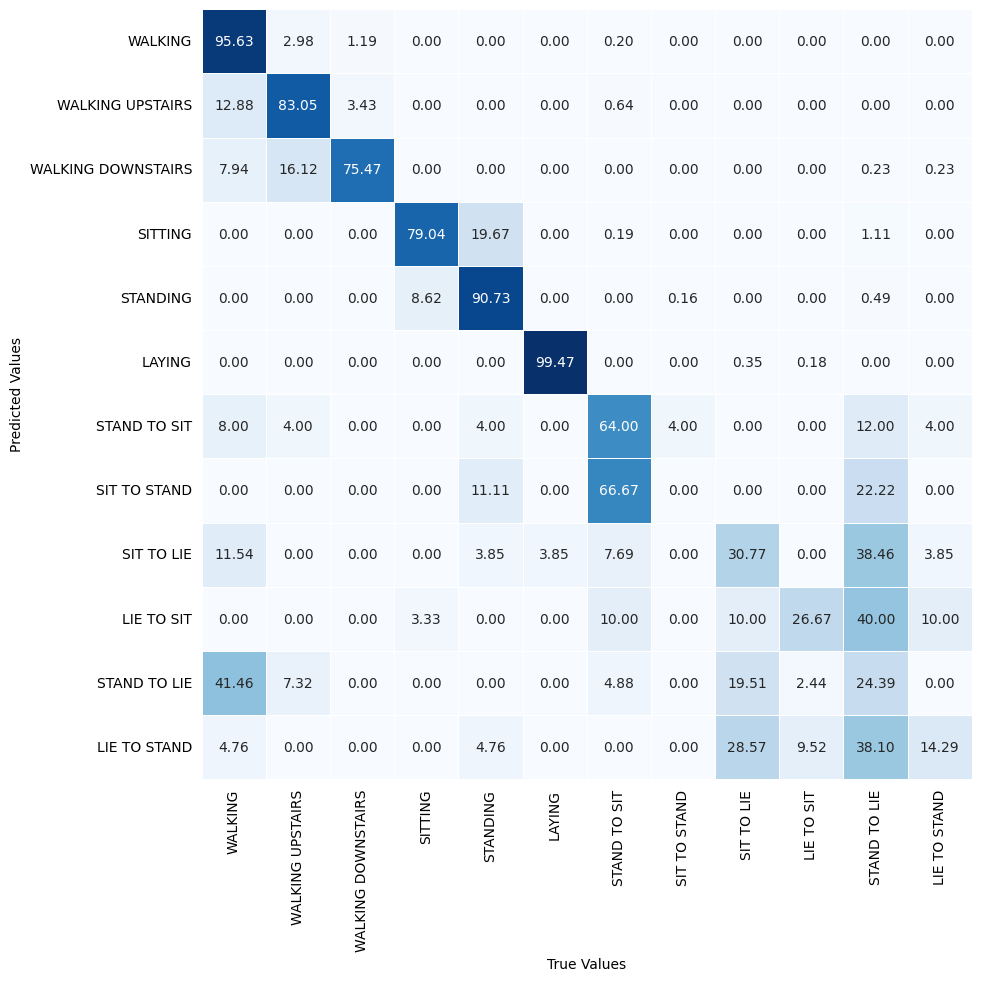

In [58]:
# Generate a random dataset
data = np.array(
[
    [482, 15,  6,  0,  0,  0,  1,  0,  0,  0,  0,  0],
    [60,  387, 16,  0,  0,  0,  3,  0,  0,  0,  0,  0],
    [34,  69, 323,  0,  0,  0,  0,  0,  0,  0,  1,  1],
    [0,   0,  0, 426, 106,  0,  1,  0,  0,  0,  6,  0],
    [0,   0,  0,  53, 558,  0,  0,  1,  0,  0,  3,  0],
    [0,   0,  0,  0,  0, 566,  0,  0,  2,  1,  0,  0],
    [2,   1,  0,  0,  1,  0, 16,  1,  0,  0,  3,  1],
    [0,   0,  0,  0,  1,  0,  6,  0,  0,  0,  2,  0],
    [3,   0,  0,  0,  1,  1,  2,  0,  8,  0, 10,  1],
    [0,   0,  0,  1,  0,  0,  3,  0,  3,  8, 12,  3],
    [17,  3,  0,  0,  0,  0,  2,  0,  8,  1, 10,  0],
    [1,   0,  0,  0,  1,  0,  0,  0,  6,  2,  8,  3]
]
)

data = 100 * data.astype('float')/ data.sum(axis=1)[:, np.newaxis]

activity_labels = load_data_frame('activity_labels')
activity_labels.columns = ['id', 'activity']
for i in range(0, len(activity_labels.activity)):
    activity_labels.activity[i] = activity_labels.activity[i].replace("_", " ")

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))
plt.tick_params(left=False, bottom=False)

# Create a heatmap with seaborn
a = sns.heatmap(data, 
            annot=True,      # Annotate each cell with the numeric value
            fmt=".2f",       # Format the annotation to 2 decimal places
            cmap="Blues", # Use a different color map
            cbar=False,
            linewidths=.5,    # Add lines between the cells
            linecolor='white', # Set the line color
            square=True,
            xticklabels=activity_labels.activity, yticklabels=activity_labels.activity
            )      # Keep cells square-shaped

a.set_xlabel("True Values")
a.set_ylabel("Predicted Values")

# Add a title and show the plot
plt.show()